    # Lab 8   Find the frequencies

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

Begin by loading the CSV file provided into a DataFrame

In [300]:
csvDat = pd.read_csv('lab8.csv')
print(csvDat.head())

                      Unnamed: 0         A         B    C         D         E
0  1970-01-01 00:00:00.000000000 -0.253426  0.000000 -1.0  0.000000  0.000000
1  1970-01-01 00:00:00.000022676 -0.468427  0.036466  1.0  0.045119  0.076461
2  1970-01-01 00:00:00.000045351  0.270393  0.072883  1.0  0.090138  0.152427
3  1970-01-01 00:00:00.000068027  0.382936  0.109203  1.0  0.134954  0.227406
4  1970-01-01 00:00:00.000090703 -0.152181  0.145378  1.0  0.179467  0.300912


In [301]:
csvDat['Times'] =  ([pd.Timestamp(time) for time in csvDat['Unnamed: 0']])
#print(times)

Build ACF plots for each of the columns (I'd suggest using lags up to 400)

In [302]:
lags = range(0,1200)
plt.rc('figure', figsize=(25, 10))
bwidth = 0.3

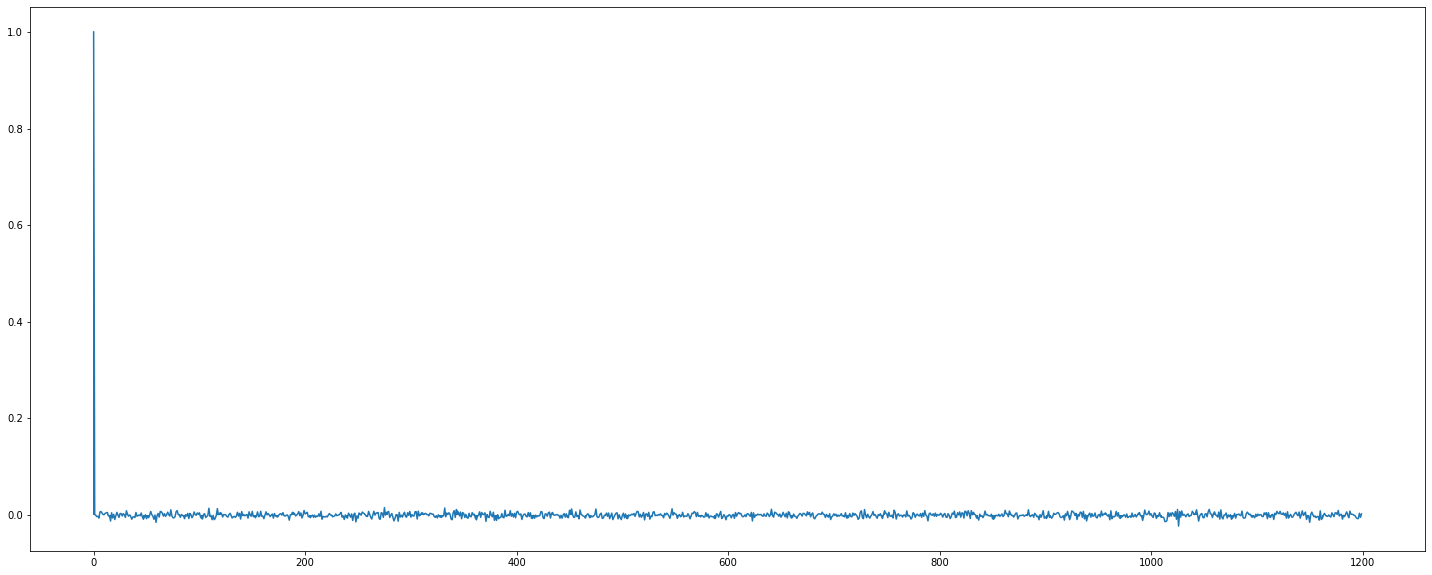

In [303]:
corrsA = np.array([csvDat.A.autocorr(n) for n in lags])
plt.bar(lags, corrsA, width = bwidth)
plt.plot(lags, corrsA)
plt.show()

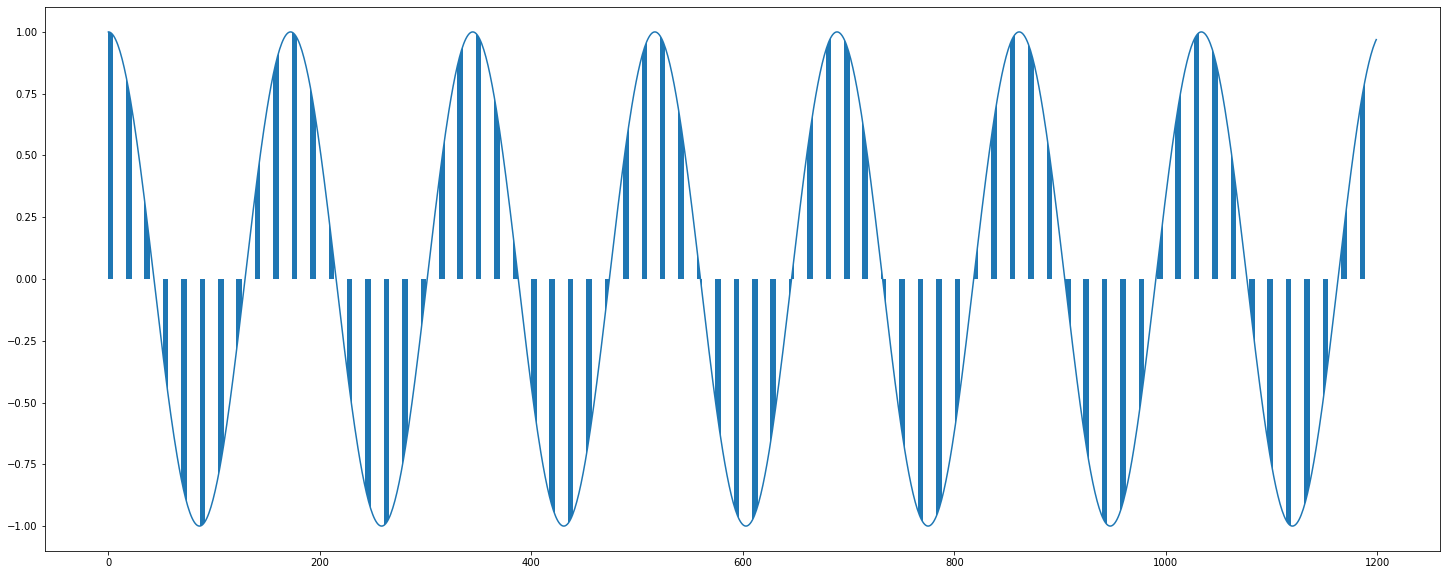

In [304]:
corrsB = np.array([csvDat.B.autocorr(n) for n in lags])
plt.bar(lags, corrsB, width = bwidth)
plt.plot(lags, corrsB)
plt.show()

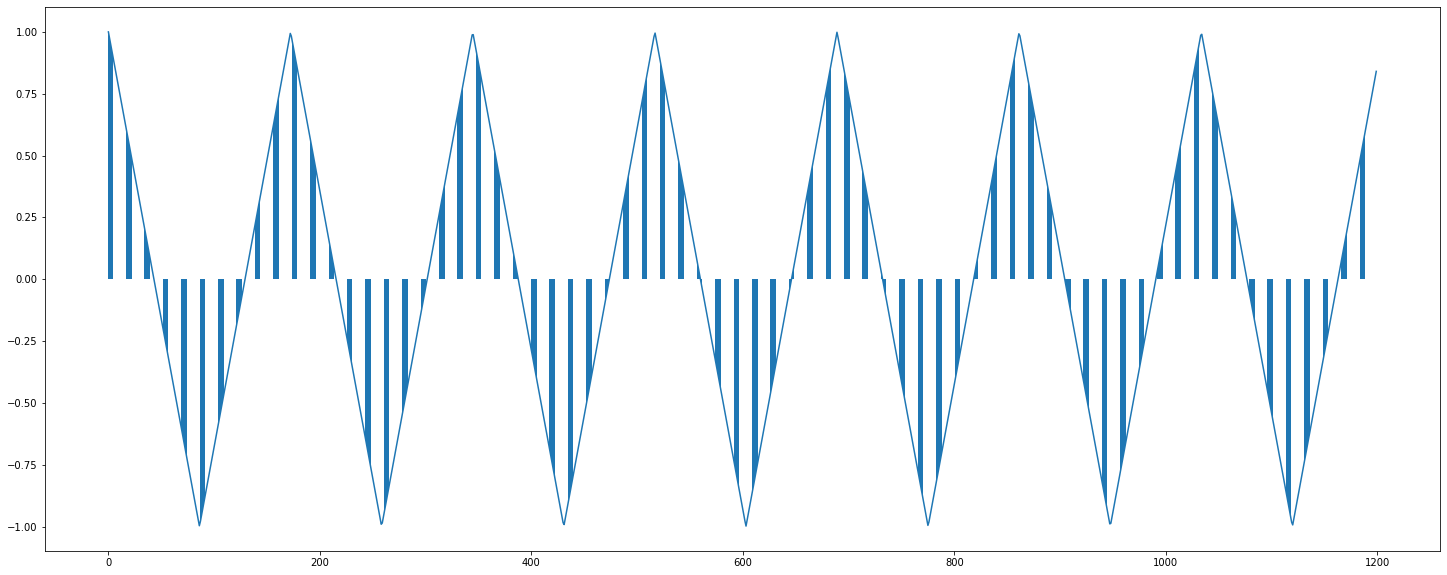

In [305]:
corrsC = np.array([csvDat.C.autocorr(n) for n in lags])
plt.bar(lags, corrsC, width = bwidth)
plt.plot(lags, corrsC)
plt.show()

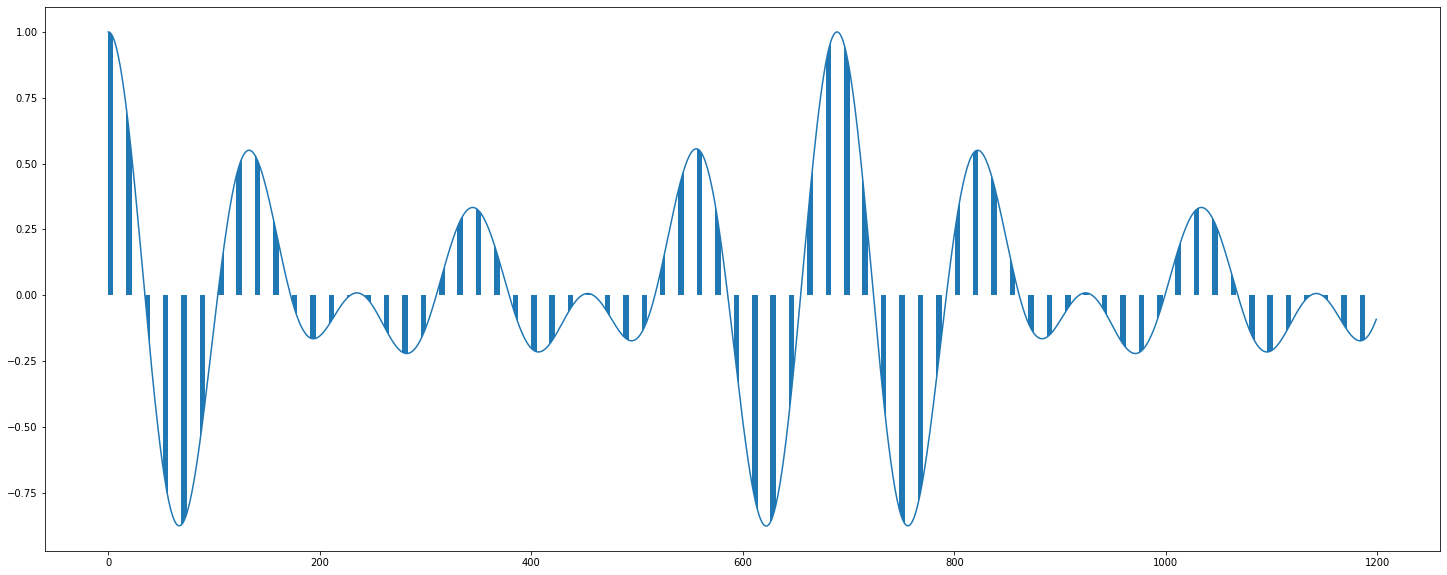

In [306]:
corrsD = np.array([csvDat.D.autocorr(n) for n in lags])
plt.bar(lags, corrsD, width = bwidth)
plt.plot(lags, corrsD)
plt.show()

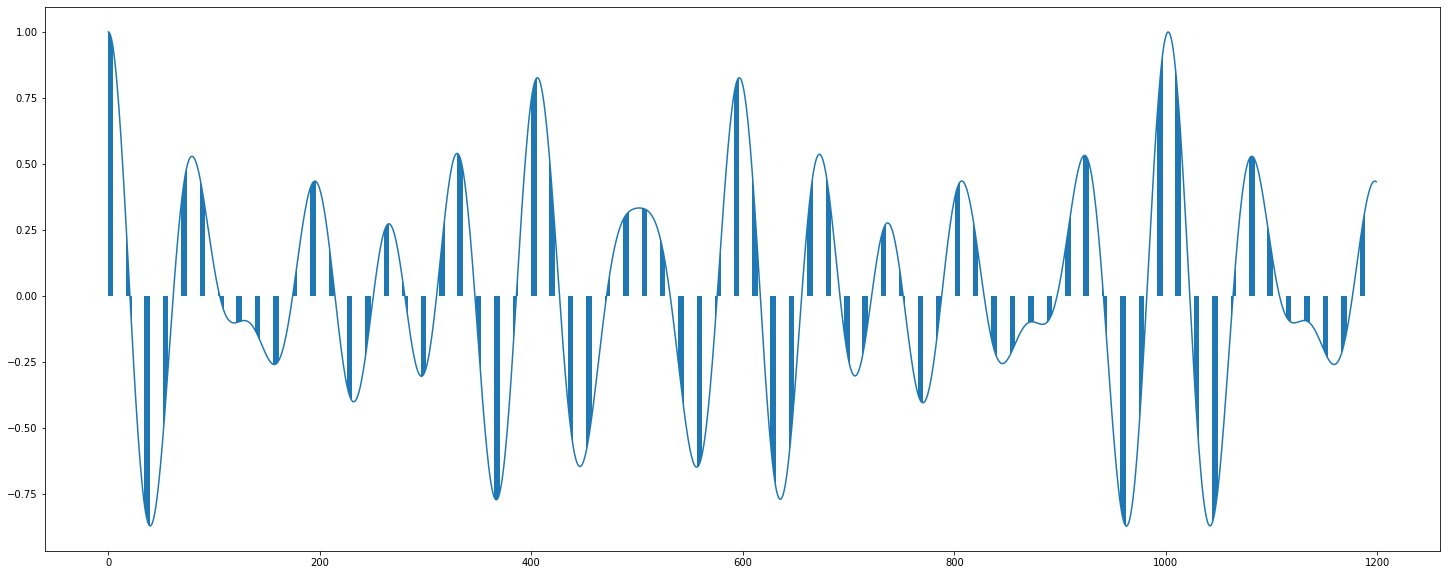

In [307]:
corrsE = np.array([csvDat.E.autocorr(n) for n in lags])
plt.bar(lags, corrsE, width = bwidth)
plt.plot(lags, corrsE)
plt.show()

Identify which of the columns is random 

It seems column A is random, as the correlation value is consistently low all other graphs have spikes in correlation somewhere

For each non-random column, find lags that give high correlation and use these to compute the frequency.  Note that you'll need to figure out the sample rate to do this.

In [308]:
sampleRate = csvDat['Times'].diff().mode()[0]
sampleRate

Timedelta('0 days 00:00:00.000022676')

Complete this lab and turn in the notebook by email by Monday, May 2nd.

In [309]:
peaksB = np.where(((corrsB[1:-1] > corrsB[0:-2]) * (corrsB[1:-1] > corrsB[2:])))[0] + 1
maxB = peaksB[np.where(corrsB[peaksB]>0.9)[0]]
perB = maxB[0]
if len(maxB) > 1:
    perB =  int(pd.DataFrame(maxB).diff().mode()[0])
perB = perB*sampleRate.total_seconds()
print(perB)

0.003784


In [310]:
peaksC = np.where(((corrsC[1:-1] > corrsC[0:-2]) * (corrsC[1:-1] > corrsC[2:])))[0] + 1
maxC = peaksC[np.where(corrsC[peaksC]>0.9)[0]]
perC = maxC[0]
if len(maxC) > 1:
    perC =  int(pd.DataFrame(maxC).diff().mode()[0])
perC = perC * sampleRate.total_seconds()
print(perC)

0.003784


In [311]:
peaksD = np.where(((corrsD[1:-1] > corrsD[0:-2]) * (corrsD[1:-1] > corrsD[2:])))[0] + 1
maxD = peaksD[np.where(corrsD[peaksD]>0.9)[0]]
perD = maxD[0]
if len(maxD)>1:
    print(len(maxD))
    perD =  int(pd.DataFrame(maxD).diff().mode()[0])
perD = perD*sampleRate.total_seconds()
print(perD)

0.015158


In [312]:
peaksE = np.where(((corrsE[1:-1] > corrsE[0:-2]) * (corrsE[1:-1] > corrsE[2:])))[0] + 1
maxE = peaksE[np.where(corrsE[peaksE]>0.9)[0]]
perE = maxE[0]
if len(maxD)>1:
    perE =  int(pd.DataFrame(maxE).diff().mode()[0])
perE = perE*sampleRate.total_seconds()
print(perE)

0.022044


In [313]:
freqB = 1/perB
freqC = 1/perC
freqD = 1/perD
freqE = 1/perE
print("Frequency in seconds\nB: " + freqB.__str__() + "\nC: " + freqC.__str__() + "\nD: " + freqD.__str__() + "\nE: " + freqE.__str__())

Frequency in seconds
B: 264.2706131078224
C: 264.2706131078224
D: 65.97176408497164
E: 45.363817818907634
